# Feature Engineering

## <a href='#I'>I Overview of the Data Science Process</a>
## <a href='#II'>II Data cleaning</a>
### <a href='#II.1'>II.1 Handling missing values</a>
#### <a href='#II.1.1'>II.1.1 Missing (null) values in Pandas</a>
#### <a href='#II.1.2'>II.1.2 Detecting missing values</a>
#### <a href='#II.1.3'>II.1.3 Droping missing values</a>
#### <a href='#II.1.4'>II.1.4 Numerical Imputation</a>
### <a href='#II.2'>II.2 Outliers</a>
#### <a href='#II.2.1'>II.2.1 Box plots and Outlier Detection</a>
#### <a href='#II.2.2'>II.2.2 Statistical methodologies</a>
##### <a href='#II.2.2.1'>II.2.2.1 Outlier Detection with Standard Deviation</a>
##### <a href='#II.2.2.2'>II.2.2.2 Outlier Detection with Percentiles</a>
#### <a href='#II.2.3'>II.2.3 When outliers are detected: Drop or Cap ?</a>
### <a href='#II.3'>II.3 Bucketing (Binning) Continuous Variables in pandas</a>
### <a href='#II.4'>II.4 Scaling and Standardizing</a>
#### <a href='#II.4.1'>II.4.1 Scikit-Learn Scalers and Standardizers</a>
#### <a href='#II.4.2'>II.4.2 How to scale/standardize our dataset correctly</a>
### <a href="#II.5">II.5 Encoding data</a>
#### <a href="#II.5.1">II.5.1 OHE with Pandas</a>
#### <a href="#II.5.2">II.5.2 OHE with Scikit_Learn</a>
#### <a href="#II.5.3">II.5.3 OHE with category encoders</a>
## <a href="#III"> III Feature selections and PCA</a>
### <a href="#III.1">III.1 Principal Component Analysis (PCA)</a>
#### <a href="#III.1.1">III.1.1 Preparing data before using PCA </a>
#### <a href="#III.1.2">III.1.2 How it works </a>
### <a href="#III.2">III.2 Implementing PCA with Scikit-Learn</a>
#### <a href="#III.2.1">III.2.1 Using the PCA engine</a>

# Feature Engineering

<a id="I"></a>
## I Overview of the Data Science Process

A typical data science process might look like this:

1. Data Collection
2. Exploratory Analysis (EDA): using different kind of plots and measures
3. Feature Engineering: 
    - Data Cleaning: removing duplicates, handling missing values, fixing mislabeled classes, scaling, standardizing, encoding, binning, ...
    - Feature selections and PCA
4. Model Training (including cross-validation to tune hyper-parameters)
4. Project Delivery / Insights

According to a survey in Forbes, data scientists spend 80% of their time on data preparation Data Collection + Feature Engineering):

<img src="nbimages/forbes.jpg" alt="Data Science Process" title="Data Science Process" width=400 height=400 />

This metric is very impressive and it highlights the importance of feature engineering in data science.

<a id="II"></a>
## II Data cleaning

Data cleaning include the following tasks:

1. Handling missing values
2. Detecting Outliers
3. Bucketing (binning)
4. Scaling and Standardizing
5. Encoding
...


<a id="II.1"></a>
### II.1 Handling missing values
Missing values are one of the most common problems you can encounter when you try to prepare your data for machine learning. The reason for the missing values might be human errors, interruptions in the data flow, privacy concerns, and so on. Whatever is the reason, missing values affect the performance of the machine learning models.

<a id="II.1.1"></a>
#### II.1.1 Missing (null) values in Pandas

When Pandas construct a DataFrame with the help of CSV file, an empty cell, NaN, NA, n/a or N/A are considered as null value (but, for instance, na is not considered as being a null value ...)

If the DataFrame is created with the help of some Python data (list, dict, array, ...) numpy.NaN or None will be considered as null values.

The method __notnull()__ returns a dataframe of Boolean values which are False for null values.

The method __isnull()__ returns a dataframe of Boolean values which are True for null values.

In [44]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all" # default is 'last'

import pandas as pd
import numpy as np

# Here is what the CSV file looks like:
with open("datasets/property.csv") as f:
    for line in f:
        print(line)
        
# Now we read the csv file into a pandas dataframe. By default an empty cell, NaN, NA, n/a or N/A are 
# considered as null value 

df = pd.read_csv("datasets/property.csv")
df
df.isnull()
print(f"Number of null values: {np.sum(df.isnull().values.flatten())}")

PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT

100001000,104,PUTNAM,Y,3,1,1000

100002000,197,LEXINGTON,N,3,1.5,--

100003000,,LEXINGTON,N,n/a,N/A,850

100004000,201,BERKELEY,12,1,NaN,700

,203,BERKELEY,Y,3,2,1600

100006000,207,BERKELEY,Y,NA,1,800

100007000,NA,WASHINGTON,,2,NaN,950

100008000,213,TREMONT,Y,1,1,

100009000,215,TREMONT,Y,na,2,1800


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1.0,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,NaN,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2.0,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000.0,213.0,TREMONT,Y,1,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,na,2.0,1800


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,True,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,True,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


Number of null values: 10


In [45]:
# To make other values than NaN, empty cells, ... be considered as null values you can 
# use the following trick:
missing_values = ["na", "--"]
df = pd.read_csv("datasets/property.csv", na_values = missing_values)
df
# A first way to count total number of missing values:
print(f"Number of null values: {np.sum(df.isnull().values.flatten())}")

# Another way to count total number of missing values:
print(f"Number of null values: {df.isnull().sum().sum()}")

# Total missing values for each feature
print(f"Total missing values for each feature {df.isnull().sum()}")

# Do we have any missing values at all ?
print(f"Do we have any missing values at all ? : {df.isnull().values.any()}")


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,NaN,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


Number of null values: 12
Number of null values: 12
Total missing values for each feature PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    3
NUM_BATH        3
SQ_FT           2
dtype: int64
Do we have any missing values at all ? : True


<a id="II.1.2"></a>
#### II.1.2 Detecting missing values

With the help of __isnull()__ and __boolean selection__ we can identify the missing values

In [46]:
# filtering data
bool_series = pd.isnull(df["ST_NUM"]) # <=> bool_series = df["ST_NUM"].isnull()
# displaying rows only with ST_NUM = NaN  
df[bool_series] 

# creating bool series True for NaN values  
bool_series = pd.notnull(df["ST_NUM"])  # <=> bool_series = df["ST_NUM"].notnull()
# displayind rows only with ST_NUM = Not NaN  
df[bool_series]

# Select the rows of df where 'NUM_BEDROOMS' is not NaN and 'NUM_BATH' is not NaN
df2=df[df['NUM_BEDROOMS'].notnull() & df['NUM_BATH'].notnull()]
print(df2)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
2,100003000.0,NaN,LEXINGTON,N,NaN,NaN,850.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


           PID  ST_NUM    ST_NAME OWN_OCCUPIED  NUM_BEDROOMS  NUM_BATH   SQ_FT
0  100001000.0   104.0     PUTNAM            Y           3.0       1.0  1000.0
1  100002000.0   197.0  LEXINGTON            N           3.0       1.5     NaN
4          NaN   203.0   BERKELEY            Y           3.0       2.0  1600.0
7  100008000.0   213.0    TREMONT            Y           1.0       1.0     NaN


<a id="II.1.3"></a>
#### II.1.3 Droping missing values

The most simple solution to the missing values is to drop (with the help of __dropna()__) the rows or the entire column that do contain more than a certain amount of missing values.<br>

In [47]:
# The dropna() method drop Rows/Columns of dataframe with Null values in different ways.
dict = {'First Score':[None, 90, np.nan, 95], 
        'Second Score': [None, np.nan, 45, 56], 
        'Third Score':[None, 40, 80, 98], 
        'Fourth Score':[np.nan, np.nan, np.nan, None]} 
  
# creating a dataframe from dictionary 
df = pd.DataFrame(dict)  
df
# Dropping rows with at least 1 null value.
df1=df.dropna()
df1
#  Dropping rows if all values in that row are missing
df1=df.dropna(how = 'all') 
df1

# Dropping columns with at least 1 null value.
df1=df.dropna(axis=1)
df1

# Dropping columns if all values in that column are missing
df1=df.dropna(how='all', axis=1)
df1

# Drop rows that contain less than 3 observations
df1=df.dropna(thresh=3)
df1

,First Score,Second Score,Third Score,Fourth Score
0,NaN,NaN,NaN,NaN
1,90.0,NaN,40.0,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,NaN


,First Score,Second Score,Third Score,Fourth Score


,First Score,Second Score,Third Score,Fourth Score
1,90.0,NaN,40.0,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,NaN


""
0
1
2
3


,First Score,Second Score,Third Score
0,NaN,NaN,NaN
1,90.0,NaN,40.0
2,NaN,45.0,80.0
3,95.0,56.0,98.0


,First Score,Second Score,Third Score,Fourth Score
3,95.0,56.0,98.0,NaN


In [48]:
# You can obtain roughly the same result without making use of dropna():

dict = {'First Score':[None, 90, np.nan, 95], 
        'Second Score': [None, np.nan, 45, 56], 
        'Third Score':[None, 40, 80, 98], 
        'Fourth Score':[np.nan, np.nan, np.nan, None]} 
  
# creating a dataframe from dictionary 
data = pd.DataFrame(dict)
data
threshold = 0.75

#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]
data

#Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]
data

,First Score,Second Score,Third Score,Fourth Score
0,NaN,NaN,NaN,NaN
1,90.0,NaN,40.0,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,NaN


,First Score,Second Score,Third Score
0,NaN,NaN,NaN
1,90.0,NaN,40.0
2,NaN,45.0,80.0
3,95.0,56.0,98.0


,First Score,Second Score,Third Score
1,90.0,NaN,40.0
2,NaN,45.0,80.0
3,95.0,56.0,98.0


<a id="II.1.4"></a>
#### II.1.4 Numerical Imputation

In order to fill null values in a datasets, we can use __fillna()__, __replace()__ and __interpolate()__ methods.<br>
These methods replace NaN values with some value of their own.  <br>
__interpolate()__ uses various interpolation technique to fill the missing values rather than hard-coding the value.<br>

__Imputation__ is a more preferable option rather than dropping because it preserves the data size. However it is important to select properly what you impute to the missing values: <br>

1. A possible default value of missing values in the column: if you have a feature that shows the "customer visit count", the missing values might be replaced with 0 as long as you think it is a sensible solution.

<pre>data['column_name'].<b>fillna(0, inplace=True)</b></pre>

2. Use the medians of the corresponding feature values (the averages of the columns are sensitive to the outlier values, while medians are more solid in this respect).

<pre>data['column_name'].<b>fillna(data['column_name'].median(), inplace=True)</b></pre>

3. Replacing the missing values with the maximum occurred value of the corresponding feature is a good option for handling categorical features. But if the values are distributed uniformly and there is not a dominant value, imputing a category like "Other" might be more sensible.

<pre>data['column_name'].<b>fillna(data['column_name'].value_counts().idxmax(), inplace=True)</b></pre>

Filling missing values using __fillna()__, __replace()__ and __interpolate()__: <br>



In [49]:
# dict of lists 
dict = {'First Score':[100, 90, np.nan, 95], 
        'Second Score': [30, 45, 56, np.nan], 
        'Third Score':[np.nan, 40, 80, 98],
       } 
  
# creating a dataframe from dict
df = pd.DataFrame(dict) 
df['Third Score'].value_counts()
df
# filling missing value using fillna() and a fixed value 
df1=df.fillna(0)
df1

# filling a missing value with 
# previous valid ones   
df2=df.fillna(method ='pad') 
df2
# filling a missing value using the next valid observation to fill gap
df3=df.fillna(method ='bfill') 
df3

# with the argument inplace=True the dataframe itself is updated
df.fillna(0, inplace=True)
df

df = pd.DataFrame(dict)
# filling a missing values in 'Second Score' with the mean value of 'Second Score'
df['Second Score'].fillna(df['Second Score'].mean(), inplace=True)
df

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
        'sex': ['m', "f", 'f', 'm', 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
# filling a missing values in 'postTestScore' with the feminin or masculin mean of 'postTestScore' 
dfN = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'sex', 'preTestScore', 'postTestScore'])
dfN["postTestScore"].fillna(dfN.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
dfN

Third Score
40.0    1
80.0    1
98.0    1
Name: count, dtype: int64

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


C:\Users\jpf\AppData\Local\Temp\ipykernel_14908\1923679078.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2=df.fillna(method ='pad')


,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,56.0,80.0
3,95.0,56.0,98.0


C:\Users\jpf\AppData\Local\Temp\ipykernel_14908\1923679078.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3=df.fillna(method ='bfill')


,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,56.0,80.0
3,95.0,NaN,98.0


,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


C:\Users\jpf\AppData\Local\Temp\ipykernel_14908\1923679078.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Second Score'].fillna(df['Second Score'].mean(), inplace=True)


,First Score,Second Score,Third Score
0,100.0,30.000000,NaN
1,90.0,45.000000,40.0
2,NaN,56.000000,80.0
3,95.0,43.666667,98.0


C:\Users\jpf\AppData\Local\Temp\ipykernel_14908\1923679078.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfN["postTestScore"].fillna(dfN.groupby("sex")["postTestScore"].transform("mean"), inplace=True)


,first_name,last_name,sex,preTestScore,postTestScore
0,Jason,Miller,m,4.0,25.0
1,NaN,NaN,f,NaN,70.0
2,Tina,Ali,f,NaN,70.0
3,Jake,Milner,m,2.0,62.0
4,Amy,Cooze,f,3.0,70.0


In [50]:
# we can replace values (null or not null) with the help of the method replace()
dict = {'First Score':[100, 90, np.nan, 95], 
        'Second Score': [30, 45, 56, np.nan], 
        'Third Score':[np.nan, 40, 80, 98]} 
  
# creating a dataframe from dict
df = pd.DataFrame(dict) 
print(df)
df.replace(to_replace = np.nan, value = 0, inplace=True)
print(df)

   First Score  Second Score  Third Score
0        100.0          30.0          NaN
1         90.0          45.0         40.0
2          NaN          56.0         80.0
3         95.0           NaN         98.0
   First Score  Second Score  Third Score
0        100.0          30.0          0.0
1         90.0          45.0         40.0
2          0.0          56.0         80.0
3         95.0           0.0         98.0


In [51]:
# The interpolate() method can be used to replace the missing values using different methods
# (linear, time, nearest, ...) to provide a replacement value
import pandas as pd
df = pd.DataFrame({"A":[3, 4, 5, None, 7],  
                   "B":[None, 4, 6, 8, None],  
                   "C":[20, 16, None, 3, 8],  
                   "D":[14, 3, None, None, 6]}) 
df
df1=df.interpolate(method="linear")
df1

df1=df.interpolate(method="pad")
df1

,A,B,C,D
0,3.0,NaN,20.0,14.0
1,4.0,4.0,16.0,3.0
2,5.0,6.0,NaN,NaN
3,NaN,8.0,3.0,NaN
4,7.0,NaN,8.0,6.0


,A,B,C,D
0,3.0,NaN,20.0,14.0
1,4.0,4.0,16.0,3.0
2,5.0,6.0,9.5,4.0
3,6.0,8.0,3.0,5.0
4,7.0,8.0,8.0,6.0


C:\Users\jpf\AppData\Local\Temp\ipykernel_14908\2453768338.py:12: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1=df.interpolate(method="pad")


,A,B,C,D
0,3.0,NaN,20.0,14.0
1,4.0,4.0,16.0,3.0
2,5.0,6.0,16.0,3.0
3,5.0,8.0,3.0,3.0
4,7.0,8.0,8.0,6.0


<a id="II.2"></a>
### II.2 Outliers

According to Wikipedia, an __outlier__ is an observation point that is distant from other observations. <br>
Outliers arise due to changes in system behavior, fraudulent behavior, human error, instrument error, or simply through natural deviations in populations. A sample may have been contaminated with elements from outside the population being examined.

Many machine learning models, like linear & logistic regression, are easily impacted by the outliers in the training data.

Extreme values can be present in both dependent & independent variables, in the case of supervised learning methods.

These extreme values need not necessarily impact the model performance or accuracy, but when they do they are called "__Influential__" points.

The quickest and easiest way to identify outliers is by visualizing them using plots but they are also some statistical methodologies to help you doing so.

<a id="II.2.1"></a>
#### II.2.1 Box plots and Outlier Detection

One of the easiest and quick way to identify visualy outliers would be to plot a __BoxPlot__. 
A BoxPlot helps us to get an idea on the data distribution and identify the outliers easily.

<img src="nbimages/boxplot.png" alt="BoxPlot" title="BoxPlot" width=200 height=400 />

If the box is pushed to one side and some values are far away from the box then it’s a clear indication of outliers: each "dot" above the upper whisker(T shaoed line) of the boxplot denotes an outlier.

Let’s take the first box plot i.e, blue box plot of the figure and understand these statistical things:
1. Bottom black horizontal line of blue box plot is minimum value
2. First black horizontal line of rectangle shape of blue box plot is First quartile or 25%
3. Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
4. Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%
5. Top black horizontal line of rectangle shape of blue box plot is maximum value.
6. Small diamond shape of blue box plot is outlier data or erroneous data.

__Note__: if outliers are present, the whisker on the appropriate side is drawn to 1.5 * IQR rather than the data minimum or the data maximum. 

<img src="nbimages/boxplot2.png" alt="BoxPlot" title="BoxPlot" width=400 height=400 />

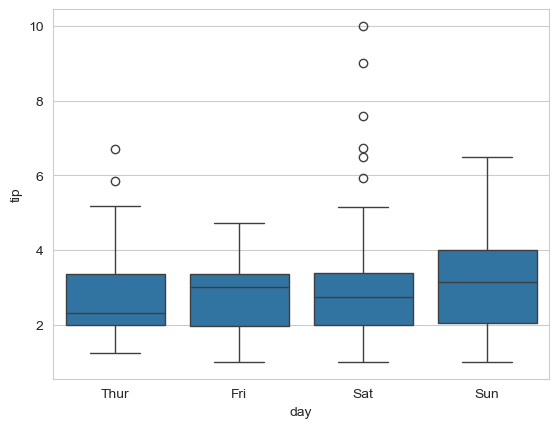

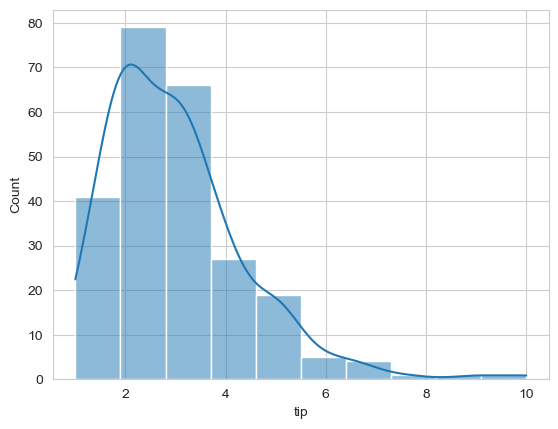

In [52]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
 
# load the dataset 
tips = sns.load_dataset('tips') 
  
tips.head()
# Draw a vertical boxplot grouped  
# by a categorical variable: 
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'day', y = 'tip', data = tips)
plt.figure()
sns.histplot(tips['tip'], kde=True, bins=10);
# We can see that the count of different tip value present in the dataset and infer 
# that most of the tips are between 2 and 4.

<a id="II.2.2"></a>
#### II.2.2 Statistical methodologies

The best way to detect the outliers is to identify them visually: statistical methodologies are open to making mistakes, whereas visualizing the outliers gives a chance to take a decision with high precision. 

Statistical methodologies are less precise than visualization technics, but on the other hand, they are fast.
Here are two different statistical methodologies commonly used to detect outliers: __standard deviation__, and __percentiles__.
<a id="II.2.2.1"></a>
##### II.2.2.1 Outlier Detection with Standard Deviation

If a value has a distance to the average higher than $ x * standard-deviation $, it can be assumed as an outlier.<br>
What x should be?
There is no trivial solution for x, but usually, a value between 2 and 4 seems practical.

__Note__: __z-score__ can be used instead of the formula above. Z-score standardizes the distance between a value and the mean using the standard deviation.


<Axes: xlabel='day', ylabel='tip'>

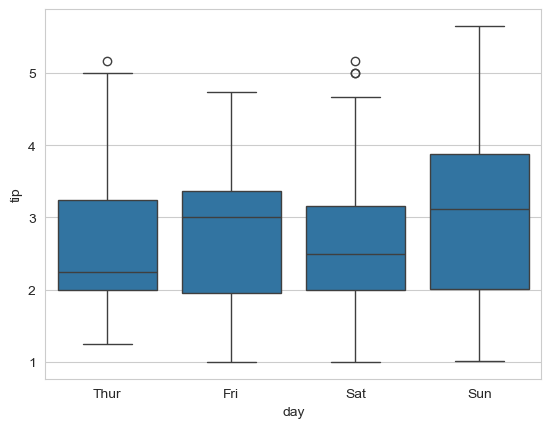

In [53]:
#Dropping the outlier rows with standard deviation
tips = sns.load_dataset('tips') 
factor = 2
upper_lim = tips['tip'].mean () + tips['tip'].std () * factor
lower_lim = tips['tip'].mean () - tips['tip'].std () * factor
tips = tips[(tips['tip'] < upper_lim) & (tips['tip'] > lower_lim)]

sns.boxplot(x = 'day', y = 'tip', data = tips) # Its better but not perfect ...

<a id="II.2.2.2"></a>
##### II.2.2.2 Outlier Detection with Percentiles

You can assume a certain percent of the value from the top or the bottom as an outlier.<br>
The key point is here to set the percentage value once again, and this depends on the distribution of your data.<br>
Additionally, a common mistake is using the percentiles according to the range of the data. In other words, if your data ranges from 0 to 100, your top 5% is not the values between 96 and 100. Top 5% means here the values that are out of the 95th percentile of data.


<Axes: xlabel='day', ylabel='tip'>

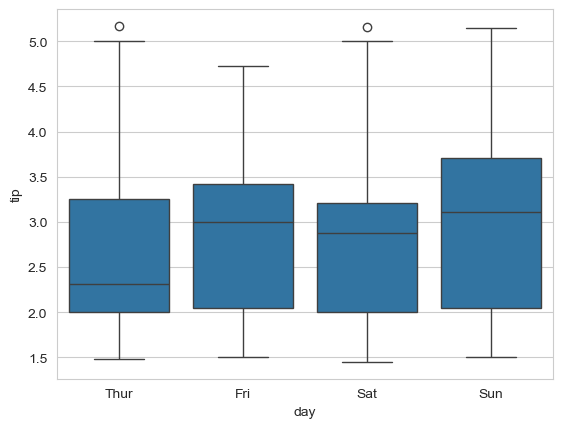

In [54]:
#Dropping the outlier rows with Percentiles
tips = sns.load_dataset('tips') 
upper_lim = tips['tip'].quantile(.95)
lower_lim = tips['tip'].quantile(.05)

tips = tips[(tips['tip'] < upper_lim) & (tips['tip'] > lower_lim)]

sns.boxplot(x = 'day', y = 'tip', data = tips) # Much better but still not perfect ...

<a id="II.2.3"></a>
#### II.2.3 When outliers are detected: Drop or Cap ?

The previous example did drop outliers, another option is to cap them instead of dropping. So you can keep your data size (it might be better for the final model performance).<br>

On the other hand, capping can affect the distribution of the data, thus it's better not to exaggerate it.

<Axes: xlabel='day', ylabel='tip'>

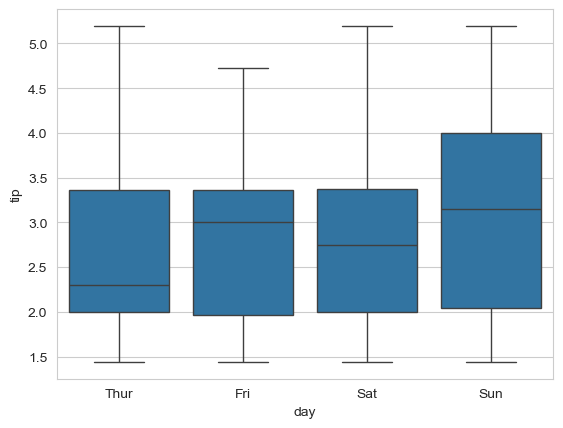

In [55]:
#Capping the outlier rows with Percentiles
tips = sns.load_dataset('tips') 
upper_lim = tips['tip'].quantile(.95)
lower_lim = tips['tip'].quantile(.05)
tips.loc[(tips['tip'] > upper_lim),'tip'] = upper_lim
tips.loc[(tips['tip'] < lower_lim),'tip'] = lower_lim
sns.boxplot(x = 'day', y = 'tip', data = tips)

<a id="II.3"></a>
### II.3 Bucketing (Binning) Continuous Variables in pandas

Bucketing (also known as binning) consist of converting __continuous data__ into discrete chunks to be used as __ordinal categorical variables__.

There is also a possibility to use binning to group categorical values into bins. This is useful when you have more categorical values in a column than you find necessary.

Numerical Binning Example:

    Value      Bin       
    0-30   ->  Low       
    31-70  ->  Mid       
    71-100 ->  High

Categorical Binning Example:

    Value      Bin       
    Spain  ->  Europe      
    Italy  ->  Europe       
    Chile  ->  South America
    Brazil ->  South America

The main motivation of binning is to make the model more robust and prevent overfitting, however, it has a cost to the performance. Every time you bin something, you sacrifice information and make your data more regularized. 
The trade-off between performance and overfitting is the key point of the binning process. 
For categorical columns, the labels with low frequencies probably affect the robustness of statistical models negatively. Thus, assigning a general category to these less frequent values helps to keep the robustness of the model.

We can use the Pandas function __pd.cut()__ or __pd.qcut()__ to cut continuous data into N discrete buckets (but there is no predefined function that could automate the binning of categorical variables).

   __pd.cut(values, N)__  
   __pd.qcut(values, N)__

_values_ must be an 1 dimensional array like object.

The result is a _Series_ with _N_ categories.

The function __pd.qcut()__ works in a way similar to cut() except that:
- with qcut() the bins will be chosen so that you have the same number of records in each bin.
- with cut() the bins will be chosen to be evenly spaced according to the values themselves and not the frequency of those values.


In [56]:
pd.cut([1, 7, 5, 4, 6, 3], 3)
pd.qcut([1, 7, 5, 4, 6, 3], 3)
pd.cut([1, 7, 5, 4, 6, 3],3, labels=["low", "medium", "high"])

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

[(0.999, 3.667], (5.333, 7.0], (3.667, 5.333], (3.667, 5.333], (5.333, 7.0], (0.999, 3.667]]
Categories (3, interval[float64, right]): [(0.999, 3.667] < (3.667, 5.333] < (5.333, 7.0]]

['low', 'high', 'medium', 'medium', 'high', 'low']
Categories (3, object): ['low' < 'medium' < 'high']

In [57]:
data=pd.DataFrame(['Spain', 'Italy','Chile', 'Brazil'], columns=["Country"])

conditions = [
    data['Country'].str.contains('Spain'),
    data['Country'].str.contains('Italy'),
    data['Country'].str.contains('Chile'),
    data['Country'].str.contains('Brazil')]

choices = ['Europe', 'Europe', 'South America', 'South America']

data['Continent'] = np.select(conditions, choices, default='Other')
data

,Country,Continent
0,Spain,Europe
1,Italy,Europe
2,Chile,South America
3,Brazil,South America


Following are more complete examples of the use of __cut()__ and __qcut()__

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
raw_df = pd.read_excel('https://github.com/chris1610/pbpython/blob/master/data/2018_Sales_Total_v2.xlsx?raw=true')
raw_df.head()
# This representation illustrates the number of customers that have sales within certain ranges.
group=raw_df.groupby(['account number', 'name'])
print(f"Number of groups: {len(group.groups)}")
df = group['ext price'].sum().reset_index()
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


Number of groups: 20


,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


<Axes: ylabel='Frequency'>

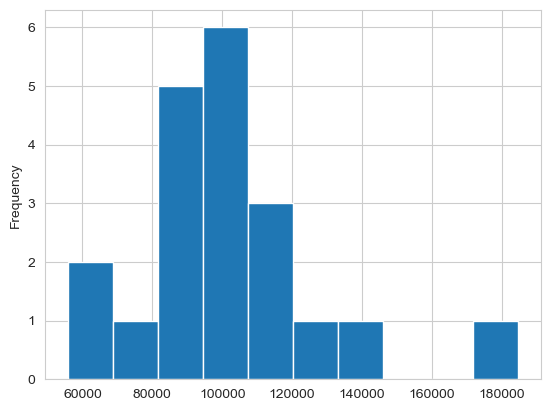

In [59]:
df['ext price'].plot(kind='hist')
# In the example above, there are 8 bins with data. 
# What if we wanted to divide our customers into 3, 4 or 5 groupings? 
# That’s where pandas qcut() and cut() come into play. 

In [60]:
# Pandas qcut() tries to divide up the underlying data into equal sized bins. 
# The function defines the bins using percentiles based on the distribution of the data
# The simplest use of qcut is to define the number of quantiles and let pandas figure out 
# how to divide up the data. 
# In the example below, we tell pandas to create 4 equal sized groupings of the data.
res1=pd.qcut(df['ext price'], q=4)
# The result is a categorical series representing the sales bins.
res1
# You can use of precision attribute to define how many decimal points to use for calculating the bin precision.
res2=pd.qcut(df['ext price'], q=8, precision=2)
res2
# A common use case is to store the bin results back in the original dataframe for future analysis
df['qcut_4']=res1
df['qcut_8']=res2
# An interesting view is to see how the values are distributed across the bins using value_counts().
# Pandas does its best to put an equal number of observations in each bin:
df['qcut_8'].value_counts()
# One of the challenges with this approach is that the bin labels are not very easy to explain to an end user. 
# For instance, if we wanted to divide our customers into 5 groups (aka quantiles) like an airline frequent 
# flier approach, we can explicitly label the bins to make them easier to interpret.
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['qcut_5'] = pd.qcut(df['ext price'],
                              q=5,
                              labels=bin_labels_5)
df['qcut_5'].value_counts()
df['qcut_5b'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df['qcut_5b'].value_counts()
df.head()

0     (55733.049000000006, 89137.708]
1             (89137.708, 100271.535]
2     (55733.049000000006, 89137.708]
3              (110132.552, 184793.7]
4             (89137.708, 100271.535]
5             (89137.708, 100271.535]
6     (55733.049000000006, 89137.708]
7            (100271.535, 110132.552]
8              (110132.552, 184793.7]
9              (110132.552, 184793.7]
10            (89137.708, 100271.535]
11    (55733.049000000006, 89137.708]
12    (55733.049000000006, 89137.708]
13            (89137.708, 100271.535]
14           (100271.535, 110132.552]
15             (110132.552, 184793.7]
16           (100271.535, 110132.552]
17             (110132.552, 184793.7]
18           (100271.535, 110132.552]
19           (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64, right]): [(55733.049000000006, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 184793.7]]

0       (55733.04, 81105.53]
1       (92446.8, 100271.54]
2       (55733.04, 81105.53]
3      (119335.15, 184793.7]
4        (89137.71, 92446.8]
5        (89137.71, 92446.8]
6       (81105.53, 89137.71]
7     (103649.17, 110132.55]
8     (110132.55, 119335.15]
9      (119335.15, 184793.7]
10      (92446.8, 100271.54]
11      (55733.04, 81105.53]
12      (81105.53, 89137.71]
13       (89137.71, 92446.8]
14    (100271.54, 103649.17]
15     (119335.15, 184793.7]
16    (103649.17, 110132.55]
17    (110132.55, 119335.15]
18    (103649.17, 110132.55]
19    (100271.54, 103649.17]
Name: ext price, dtype: category
Categories (8, interval[float64, right]): [(55733.04, 81105.53] < (81105.53, 89137.71] < (89137.71, 92446.8] < (92446.8, 100271.54] < (100271.54, 103649.17] < (103649.17, 110132.55] < (110132.55, 119335.15] < (119335.15, 184793.7]]

qcut_8
(55733.04, 81105.53]      3
(89137.71, 92446.8]       3
(103649.17, 110132.55]    3
(119335.15, 184793.7]     3
(81105.53, 89137.71]      2
(92446.8, 100271.54]      2
(100271.54, 103649.17]    2
(110132.55, 119335.15]    2
Name: count, dtype: int64

qcut_5
Bronze      4
Silver      4
Gold        4
Platinum    4
Diamond     4
Name: count, dtype: int64

qcut_5b
Bronze      4
Silver      4
Gold        4
Platinum    4
Diamond     4
Name: count, dtype: int64

,account number,name,ext price,qcut_4,qcut_8,qcut_5,qcut_5b
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55733.04, 81105.53]",Bronze,Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(92446.8, 100271.54]",Gold,Gold
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(55733.04, 81105.53]",Bronze,Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(119335.15, 184793.7]",Diamond,Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(89137.71, 92446.8]",Silver,Silver


In [61]:
# The major distinction beteen qcut() and cut() is that qcut() will calculate the size of 
# each bin in order to make sure the distribution of data in the bins is equal. 
# In other words, all bins will have (roughly) the same number of observations but the 
# bin range will vary.

# On the other hand, cut is used to specifically define the bin edges. 
# There is no guarantee about the distribution of items in each bin.
df['cut_4']=pd.cut(df['ext price'], bins=4)
# Here the bin ranges are all about 32,265 but the distribution of bin elements is not equal.
df['cut_4'].value_counts()
# When using cut(), you can define the exact edges of your bins 
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 70000, 100000, 130000, 200000]
# Note: numpy.arange() and numpy.linspace() may help providing equally spaced range
# bins=np.linspace(0, 200000, 9)
df['cut_42'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)

# Like qcut() we can adjust the precision using the precision argument.
# You can also use the include_lowest parameter to define whether or not the 
# first bin should include all of the lowest values. 

cut_4
(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: count, dtype: int64

<a id="II.4"></a>
### II.4 Scaling and Standardizing

Many machine learning algorithms perform better or converge faster when features are on a relatively _similar scale_ and/or close to _normally distributed_. <br>
Examples of such algorithm families include: linear and logistic regression, nearest neighbors, neural networks, support vector machines with radial bias kernel functions, principal components analysis, linear discriminant analysis, …<br>
One of the few categories of machine algorithms that are truly scale invariant are the tree-based methods.

__Scaling__ generally means to change the range of the values (the shape of the distribution doesn’t change). The range is often set at 0 to 1.

__Standardizing__ generally means changing the values to have a mean of zero and a standard deviation of 1 (this is also called Z-score normalization). <br>
A standardized variable (a z-score) is equal to the original variable, minus its mean, divided by its standard deviation.
Standardizing outputs something very close to a normal distribution and Scaling is often implied.

__Note__: sometimes you might not want to scale your data: the data provided is proportional, so scaling  might not provide correct estimators, or, the scale between your data features does matters so you want to keep in your dataset. You need to think about your data, and understand if the transformations you’re applying are in line with the outcomes you’re searching for.

<a id="II.4.1"></a>
#### II.4.1 Scikit-Learn Scalers and Standardizers

Scikit Learn propose different tools to help scaling and/or standardizing:

- __MinMaxScaler__ (scaling): subtracts the minimum value in the feature and then divides by the range (the difference between the original maximum and original minimum).
MinMaxScaler preserves the shape of the original distribution.<br>
The default range for the feature returned by __MinMaxScaler__ is 0 to 1.
__Note__: this scaler doesn’t reduce the importance of outliers.<br>

- __RobustScaler__ (standardizing): transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value).<br>
_RobustScaler_ does not scale the data into a predetermined interval like _MinMaxScaler_.
_RobustScaler_ reduces the effects of outliers, relative to _MinMaxScaler_.

- __StandardScaler__ (standardizing and scaling): transforms the feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.<br>
_StandardScaler_ results in a distribution with a standard deviation and a variance equal to 1.
_StandardScaler_ makes the mean of the distribution 0. <br>
About 68% of the values will lie be between -1 and 1.
__Note__: this scaler doesn’t reduce the importance of outliers.<br>

Other Scaler/Transformer are provided but these 3 are the most popular ones.

<a id="II.4.2"></a>
#### II.4.2 How to scale/standardize our dataset correctly

You should _fit_ the scaler using the _training data_ and then apply the scaler on the _testing data_ before the prediction.<br>
The reason is that we want to pretend that the test data is "new, unseen data". We use the test dataset to get a good estimate of how our model performs on any new data.
<br>
Now, in a real application, the new, unseen data could be just 1 data point that we want to classify. (How do we estimate mean and standard deviation if we have only 1 data point?) That’s an intuitive case to show why we need to keep and use the training data parameters for scaling the test set.<br>
In summary, here are the steps to follow:

1. fit the scaler on the TRAINING data
2. use the scaler to transform the training data
3. use the transformed training data to fit the predictive model
4. use the scaler to transform the TEST data
5. predict using the trained model and the transformed TEST data

In [62]:
# In this example we will try to predict the category to which a plant belongs 
# based on four attributes: sepal-width, sepal-length, petal-width and petal-length using an SVM algorithm.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd

data = datasets.load_iris()
X = data.data
y = data.target

# the label or target or dependent variable (a category of iris)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df=pd.DataFrame(X)
df.describe()

# Here we decide to scale the features:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = SVC(gamma='auto')
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f"Accuracy {accuracy_score(y_test, y_pred)*100:.1f} %")

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


SVC(gamma='auto')

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy 97.8 %


<a id="II.5"></a>
### II.5 Encoding data

Categorical data are common place in many Data Science and Machine Learning problems but are usually more challenging to deal with than numerical data. 

Many machine learning algorithms, for instance, require that their input is numerical and therefore categorical features must be transformed into numerical features before we can use any of these algorithms.

One of the most common ways to make this transformation is to __one-hot encode__ the categorical features, especially when there does not exist a natural ordering between the categories (e.g. a feature 'City' with names of cities such as 'London', 'Lisbon', 'Berlin', etc.). 
For each unique value of a feature (say, 'London') one column is created (say, 'City_London') where the value is 1 if for that instance the original feature takes that value and 0 otherwise.

__Note__: Several other encoding mechanism do exist: LabelEncoder, PolynomialEncoder, HashingEncoder, ... <br>
One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, you can employ one-hot-encoding followed by PCA for dimensionality reduction. 

__Scikit-learn__ and __Pandas__ offer a __one-hot encode__ (or __OHE__) implementation, but the best approach is usually to use the __category encoders__ library to achieve the same thing in a much easier fashion.

<a id="II.5.1"></a>
#### II.5.1 OHE with Pandas

Pandas OHE implementation is called __pd.get_dummies()__: a way to create dummy variables for categorical features. 

While __pd.get_dummies()__ is widely used, there are some drawbacks:

1. it modifies your dataframe: when you have a categorical feature with hundreds of categories, _get_dummies()_ adds hundreds of dummy variables to the dataframe. 

2. if there are many categorical features in the dataset, you will have to call _get_dummies()_ for every feature. 

In [63]:
import pandas as pd
df = pd.read_csv('datasets/breast-cancer_csv.csv')
# The target (class) and features are described here:
#
# Class: no-recurrence-events, recurrence-events.
# age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
# menopause: lt40, ge40, premeno.
# tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44,45-49, 50-54, 55-59.
# inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
# node-caps: yes, no.
# deg-malig: 1, 2, 3.
# breast: left, right.
# breast-quad: left-up, left-low, right-up, right-low, central.
# irradiat: yes, no.

# This data set contains several categorical features: age, menopause, tumor-size, ...
df.info()
df1=pd.get_dummies(df.age)
df1.head()
df1=pd.get_dummies(df.menopause)
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


,20-29,30-39,40-49,50-59,60-69,70-79
0,False,False,True,False,False,False
1,False,False,False,True,False,False
2,False,False,False,True,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


,ge40,lt40,premeno
0,False,False,True
1,True,False,False
2,True,False,False
3,False,False,True
4,False,False,True


<a id="II.5.2"></a>
#### II.5.2 OHE with Scikit_Learn
 
__OneHotEncoder__ is a sklearn preprocessing function. Unlike _get_dummies()_, __OneHotEncoder__ does not add variables to your data frame. 
You can specifiy which columns you want to create dummies when you fit the dataset by __OneHotEncoder__.

While __OneHotEncoder__it is widely used, there are some drawbacks:

1. _OneHotEncoder_ only works with categories that are integers over or equal to zero, which means if the category names are strings or negative numbers, you will have to do some transformation before fitting _OneHotEncoder_.
2. They are situations where it is useful to drop a dummy variable (because we realize it provides the same information as another variable). This is called __Feature Selection__ the process where you automatically or manually select those features which contribute most to your prediction variable. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.
Here it is difficult to drop a dummy variable because they are not represented as separate variables in the dataframe.


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = df.drop(columns='Class')
y = df['Class'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train["inv-nodes"]

12     0-2
35     0-2
28     3-5
142    3-5
225    0-2
      ... 
188    0-2
71     3-5
106    3-5
270    6-8
102    0-2
Name: inv-nodes, Length: 143, dtype: object

In [65]:
# OneHotEncoder requires that all values are integers, and not strings as we have. 
# This means we first have to encode all the possible values as integers: thankfully, 
# there is another transformer in scikit-learn, called LabelEncoder, which does just that.
# LabelEncoder is only intended to be used for the target vector, and as such it doesn’t 
# work with more than one column. We must apply the LabelEncoder to each of the features.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train_le=pd.DataFrame()
X_train_le['age'] = le.fit_transform(X_train.age)
X_train_le['menopause'] = le.fit_transform(X_train.menopause)
X_train_le['tumor-size'] = le.fit_transform(X_train['tumor-size'])
# And so on ...
X_test_le=pd.DataFrame()
X_test_le['age'] = le.fit_transform(X_test.age)
X_test_le['menopause'] = le.fit_transform(X_test.menopause)
X_test_le['tumor-size'] = le.fit_transform(X_test['tumor-size'])
# And so on ...
X_test_le.head()

,age,menopause,tumor-size
0,1,0,7
1,0,2,6
2,2,2,3
3,1,2,3
4,1,0,5


In [66]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train_le)
# The output is a numpy array (when the option sparse=False is used), which has the disadvantage of 
# losing all the information about the original column names and values.
X_train_ohe
X_train_ohe.shape

X_test_ohe = ohe.transform(X_test_le)
X_test_ohe
X_train_ohe.shape

# Now both the training and test sets are now in a suitable form to be used in 
# machine learning algorithms which require numerical data.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(143, 20)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

(143, 20)

<a id="II.5.3"></a>
#### II.5.3 OHE with category encoders

**Category Encoders** is a library of scikit-learn-compatible categorical variable encoders, such as:
Ordinal, One-Hot, Hashing, ...

The Ordinal, One-Hot and Hashing encoders are improved versions of the ones present in scikit-learn with the following advantages:

1. Support for pandas dataframes as an input and, optionally, as output.
2. Can explicitly configure which columns in the data are encoded by name or index, or infer non-numeric columns regardless of input type.
3. Compatibility with scikit-learn pipelines.

In [67]:
# catgeory_encoders does not come with anaconda distro, you need to install it:
# conda install -c conda-forge category_encoders
# Let see how much we can simplify the workflow using category_encoders:
import category_encoders as ce
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)

X_train_ohe = ohe.fit_transform(X_train)
X_train["inv-nodes"].unique()
X_test["inv-nodes"].unique()
X_test_ohe = ohe.transform(X_test)

X_test_ohe.info()
X_test_ohe["inv-nodes_0-2"].head()
# Now both the training and test sets are in a suitable form to be used in 
# machine learning algorithms which require numerical data.

ModuleNotFoundError: No module named 'category_encoders'

<a id="III"></a>
## III Feature selections and PCA

With the availability of high performance CPUs and GPUs, it is pretty much possible to solve every regression, classification, clustering and other related problems using machine learning and deep learning models. However, there are still various factors that cause performance bottlenecks while developing such models.<br> 
Large number of features in the dataset is one of the factors that affect both the training time as well as accuracy of machine learning models.<br>
Here is where we come across __dimensionality reduction__: the process of reducing the number of features of the data set under consideration, via obtaining a set of principal features.

Here we have two different options:
1. Reduce the number of variables by merging correlated variables.
2. Extract the most important features from the dataset that are responsible for maximum variance in the output. Different statistical techniques are used for this purpose e.g. __linear discriminant analysis__, __factor analysis__, and __principal component analysis__ (__PCA__).

<a id="III.1"></a>
### III.1 Principal Component Analysis (PCA)

When using __PCA__ (the most popular dimensionality reduction technique), the feature that causes __highest variance__ is the __first principal component__. The feature that is responsible for second highest variance is considered the __second principal component__, and so on. 

The following will explain how PCA works, we will then makes use of Scikit Learn PCA implementation.

<a id="III.1.1"></a>
#### III.1.1 Preparing data before using PCA 

It is imperative to mention that a feature set must be __scaled__ and __standardized__ before applying PCA. For instance if a feature set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set. If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large.<br> 
Hence, principal components will be biased towards features with high variance, leading to false results.<br>

Furthermore, PCA is a statistical technique and can only be applied to numeric data. Therefore, categorical features are required to be __converted__ into numerical features before PCA can be applied.<br>

<a id="III.1.2"></a>
#### III.1.2 How it works 

Behind the scene, here is how the PCA algorithm works:

1. The data frame is transformed into a __matrix of features__, 
2. It calculates covariance on feature matrix => __covariance matrix__
3. It performs an __eigen decomposition__ (it computes the  __eigen values__ and __eigen vectors__ of the __covariance matrix__). The eigen values tell us the variance in the data set and eigen vectors tell us the corresponding direction of the variance.
4. The eigen values and eigen vectors are sorted: we are interested in maximum variance across features, the PCA algorithm sorts the eigen values in decreasing order and retrieve their corresponding eigen vectors accordingly.
5. To reduce dimensions of the data set from N features to M features, the PCA algorithm select the top M eigen values and the corresponding eigen vectors. 
6. To form the new data set in reduced dimensions PCA forms linear equation between the old data set and the new data set.

<a id="III.2"></a>
### III.2 Implementing PCA with Scikit-Learn

In this section we will implement PCA with the help of Python's Scikit-Learn library. <br>
We will follow the classic machine learning pipeline where we will first import libraries and dataset, perform exploratory data analysis and preprocessing, and finally train our models, make predictions and evaluate accuracies. <br>
The only additional step will be to perform PCA to find out optimal number of features before we train our models.<br>

In [ ]:
import numpy as np
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()
X = dataset.drop('Class', axis=1)
y = dataset['Class']
# Splitting the dataset into the Training set and Test set
print(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

<a id="III.2.1"></a>
#### III.2.1 Using the PCA engine

Performing PCA using Scikit-Learn is a two-step process:

1. Initialize the PCA class by passing the number of components to the constructor (by default, the number of components will correspond to the number of features).
Call the __fit()__ and then __transform()__ methods by passing the feature set to these methods. The __transform()__ method returns the specified number of principal components.

2. The PCA objects attribute **explained_variance_ratio_** returns the variance caused by each of the principal components.


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_

Here, the first principal component is responsible for 72.22% variance and the second principal component causes 23.9% variance in the dataset
=> 
96.21% percent of the classification information contained in the feature set is captured by the first two principal components). 
Let's reduce our features to the 2 first principal components.

In [ ]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_

Training and Making Predictions:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

classifier = SVC(gamma='auto')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Performance Evaluation:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix: \n\n{cm}\n")
print(f"Accuracy {accuracy_score(y_test, y_pred)*100:.1f} %")